In [50]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import geopandas as gpd
import contextily as ctx
import geoplot

In [3]:
all_trips = pd.read_csv('taxi-rides.csv')

In [4]:
all_trips.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,id3487442,2,2/29/16 18:39,2/29/16 18:42,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0,NaN,NaN,NaN
1,id1145809,2,5/16/16 23:15,5/16/16 23:31,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0,NaN,NaN,NaN
2,id3499387,1,1/25/16 19:45,1/25/16 19:54,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0,NaN,NaN,NaN
3,id0753277,1,1/27/16 22:29,1/27/16 22:29,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0,NaN,NaN,NaN
4,id2134482,1,1/22/16 16:13,1/22/16 16:13,1,-73.776314,40.645454,-73.776314,40.645454,N,19,0.0,NaN,NaN,NaN


In [5]:
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048253 entries, 0 to 1048252
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048253 non-null  object 
 1   vendor_id           1048253 non-null  int64  
 2   pickup_datetime     1048253 non-null  object 
 3   dropoff_datetime    1048253 non-null  object 
 4   passenger_count     1048253 non-null  int64  
 5   pickup_longitude    1048253 non-null  float64
 6   pickup_latitude     1048253 non-null  float64
 7   dropoff_longitude   1048253 non-null  float64
 8   dropoff_latitude    1048253 non-null  float64
 9   store_and_fwd_flag  1048253 non-null  object 
 10  duration            1048253 non-null  int64  
 11  distance            1048253 non-null  float64
 12  Unnamed: 12         0 non-null        float64
 13  Unnamed: 13         0 non-null        float64
 14  Unnamed: 14         0 non-null        float64
dtypes: float64(8), 

In [7]:
#drop not useful fields
all_trips.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis = 1, inplace = True)

In [8]:
# create datetime object for date time
all_trips['pickup_datetime'] = pd.to_datetime(all_trips.pickup_datetime)

In [9]:
# create datetime object for date time
all_trips['dropoff_datetime'] = pd.to_datetime(all_trips.dropoff_datetime)

In [10]:
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048253 entries, 0 to 1048252
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1048253 non-null  object        
 1   vendor_id           1048253 non-null  int64         
 2   pickup_datetime     1048253 non-null  datetime64[ns]
 3   dropoff_datetime    1048253 non-null  datetime64[ns]
 4   passenger_count     1048253 non-null  int64         
 5   pickup_longitude    1048253 non-null  float64       
 6   pickup_latitude     1048253 non-null  float64       
 7   dropoff_longitude   1048253 non-null  float64       
 8   dropoff_latitude    1048253 non-null  float64       
 9   store_and_fwd_flag  1048253 non-null  object        
 10  duration            1048253 non-null  int64         
 11  distance            1048253 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 96

In [11]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [13]:
all_trips.describe()[['duration', 'distance']]

,duration,distance
count,1048253.0000,1048253.0000
mean,962.3089,3.4399
std,5853.8399,4.1046
min,1.0000,0.0000
25%,397.0000,1.2326
50%,662.0000,2.0949
75%,1075.0000,3.8772
max,3526282.0000,578.8428


In [ ]:
# dirty_data = all_trips.describe()[['duration', 'distance', 'price', 'duration_distance']]

In [ ]:
# dirty_data.to_csv('dirty_data.csv', index = False)

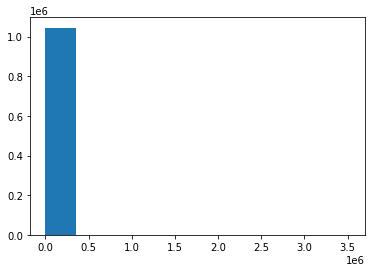

In [58]:
# Plot duration histogram
plt.hist(data=all_trips, x='duration');

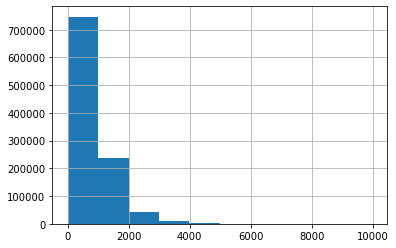

In [80]:
# Plot duration histogram below 10000
all_trips.query("duration < 10000").duration.hist();

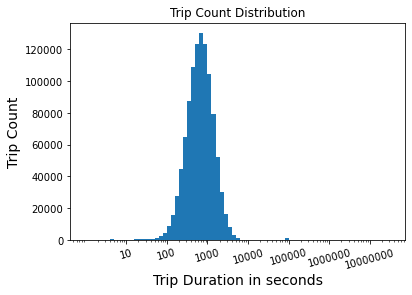

In [65]:
# histogram is extremely skewed - lets try transforming log x axis
# plot histogram using crude matplotlib
bins_edge = 10**np.arange(np.log10(all_trips.duration.min()), np.log10(all_trips.duration.max())+1, 0.1)
plt.hist(data=all_trips, x='duration', bins=bins_edge);
ticks = [10**x for x in range(1, 8)]
labels = ['{}'.format(x) for x in ticks]
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xticks(rotation = 15)
plt.xlabel('Trip Duration in seconds', fontsize=14);
plt.ylabel('Trip Count', fontsize=14);
plt.title('Trip Count Distribution');
plt.show()

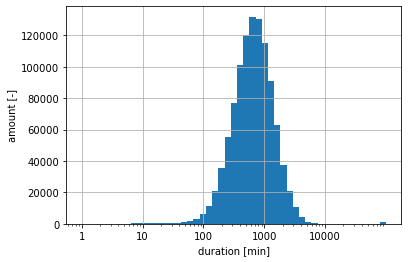

In [79]:
#plot histogram using pandas matplotlib
bins = 10**np.linspace(0,5)
all_trips.duration.hist(bins=bins);
plt.xscale('log');
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000']);
plt.xlabel('duration [min]');
plt.ylabel('amount [-]');

In [21]:
all_trips[all_trips['duration'] > 10000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance
403,id3070191,2,2016-01-01 15:27:00,2016-01-02 15:09:00,3,-73.9897,40.7357,-73.9897,40.7357,N,85333,0.0000
2799,id2761053,2,2016-05-18 13:40:00,2016-05-19 11:25:00,1,-73.9716,40.7586,-73.9716,40.7586,N,78288,0.0000
3579,id2177467,2,2016-06-05 01:09:00,2016-06-06 01:08:00,1,-73.9814,40.7650,-73.9814,40.7650,N,86352,0.0001
4312,id0759846,2,2016-06-22 08:56:00,2016-06-23 08:55:00,1,-73.9366,40.7649,-73.9366,40.7649,N,86322,0.0006
4586,id2550069,2,2016-03-23 17:20:00,2016-03-24 15:53:00,1,-73.7827,40.6440,-73.7828,40.6440,N,81205,0.0011
...,...,...,...,...,...,...,...,...,...,...,...,...
1047070,id0674455,2,2016-05-20 03:27:00,2016-05-21 00:09:00,1,-73.7821,40.6449,-73.9439,40.8250,N,74524,24.2357
1047156,id0662183,2,2016-05-03 05:47:00,2016-05-04 00:00:00,2,-73.9480,40.8299,-74.1799,40.6956,N,65550,24.5894
1047916,id3695440,2,2016-05-28 07:43:00,2016-05-29 00:00:00,1,-73.7822,40.6447,-73.8371,40.9282,N,58583,31.8664
1048207,id2510396,1,2016-01-26 06:58:00,2016-01-26 10:01:00,2,-73.7899,40.6465,-74.4588,40.7978,N,10965,58.8313


We do not have information about duration units of measurement. At this stage we assume we have to deal with seconds. There are 1522 trips with exagerated travel times. Before dropping those let's explore distance field. To be sure, we recalculate distances starting from the coordinates we have. After, we calculate reasonable travel times upon reasonable trips. To begin with we calculate our own distances and see if they are in accordance with the ones we have. Distances are calculated in km

In [85]:
!pip install haversine

In [86]:
from haversine import haversine, Unit

In [99]:
all_trips['pick_up'] = tuple(xy for xy in zip(all_trips.pickup_latitude, all_trips.pickup_longitude)) # (x, y) = (lat, lon)

In [100]:
all_trips['drop_off'] = tuple(xy for xy in zip(all_trips.dropoff_latitude, all_trips.dropoff_longitude)) # (x, y) = (lat, lon)

In [22]:
from sklearn.metrics.pairwise import haversine_distances

In [23]:
# calculate distances using haversine algorithm
def single_haversine(x1, y1, x2, y2):
    """Calculate the distance between two points on an sphere.
    
    Uses sklearn's haversine distance function
    """
    return haversine_distances([[x1, y1]], [[x2, y2]])[0][0] * 6371  # km

x1 = np.radians(all_trips.pickup_latitude.values)
y1 = np.radians(all_trips.pickup_longitude.values)
x2 = np.radians(all_trips.dropoff_latitude.values)
y2 = np.radians(all_trips.dropoff_longitude.values)

all_trips['test_distance'] = pd.Series(list(map(single_haversine, x1, y1, x2, y2)))

In [129]:
all_trips['test_distance'].describe()

count   1044739.0000
mean          3.4485
std           3.9460
min           0.0000
25%           1.2397
50%           2.1023
75%           3.8876
max          97.5862
Name: test_distance, dtype: float64

In [130]:
all_trips['distance'].describe()

count   1044739.0000
mean          3.4485
std           3.9460
min           0.0001
25%           1.2397
50%           2.1023
75%           3.8876
max          97.5862
Name: distance, dtype: float64

Our calculations are in accordance with the ones provided so we will calculate everything upon distances

In [26]:
#check all trips starting and stopping at the same point
all_trips[all_trips['distance'] == 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,traveled_dist
0,id3487442,2,2016-02-29 18:39:00,2016-02-29 18:42:00,1,-73.9818,40.7690,-73.9818,40.7690,N,227,0.0000,0.0000
1,id1145809,2,2016-05-16 23:15:00,2016-05-16 23:31:00,6,-73.8085,40.6873,-73.8085,40.6873,N,947,0.0000,0.0000
2,id3499387,1,2016-01-25 19:45:00,2016-01-25 19:54:00,1,-73.7867,40.6470,-73.7867,40.6470,N,580,0.0000,0.0000
3,id0753277,1,2016-01-27 22:29:00,2016-01-27 22:29:00,1,-74.2099,40.8169,-74.2099,40.8169,N,27,0.0000,0.0000
4,id2134482,1,2016-01-22 16:13:00,2016-01-22 16:13:00,1,-73.7763,40.6455,-73.7763,40.6455,N,19,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,id2988018,1,2016-04-15 00:46:00,2016-04-15 00:47:00,1,-73.9807,40.6861,-73.9807,40.6861,N,39,0.0000,0.0000
3500,id3914703,2,2016-04-10 15:55:00,2016-04-10 15:56:00,1,-73.9368,40.7647,-73.9368,40.7647,N,76,0.0000,0.0000
3501,id2397706,1,2016-01-28 13:00:00,2016-01-28 13:28:00,3,-73.9547,40.8210,-73.9547,40.8210,N,1706,0.0000,0.0000
3502,id2888947,2,2016-03-16 23:22:00,2016-03-16 23:27:00,6,-73.9779,40.7880,-73.9779,40.7880,N,331,0.0000,0.0000


# Drop touristic trips
We will not be taking into concideration touristic rides so we drop these 3504 trips starting and ending at the same place 

In [27]:
#drop non transit trips
all_trips.drop(all_trips[all_trips['distance'] == 0].index, inplace = True)

In [228]:
all_trips.query('pickup_longitude == dropoff_longitude & pickup_latitude == dropoff_latitude' )

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,test_distance,pick_up,drop_off,test_duration_min,test_duration_sec


Check trip durations again to see if we now have more reasonable data

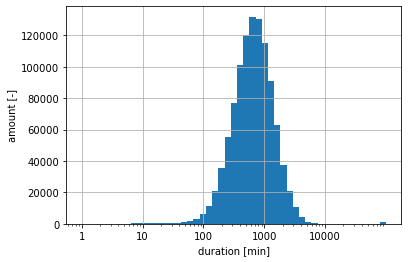

In [81]:
#plot histogram using pandas matplotlib
bins = 10**np.linspace(0,5)
all_trips.duration.hist(bins=bins);
plt.xscale('log');
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000']);
plt.xlabel('duration [min]');
plt.ylabel('amount [-]');

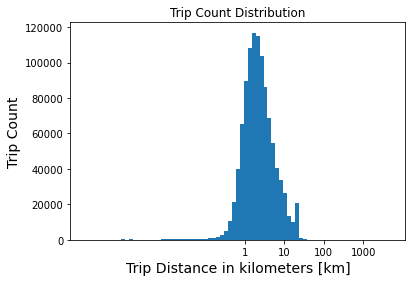

In [103]:
#histogram is extremely skewed - lets try transforming log x axis
bins_edge = 10**np.arange(np.log10(all_trips.distance.min()), np.log10(all_trips.distance.max())+1, 0.1)
plt.hist(data=all_trips, x='distance', bins=bins_edge);
ticks = [10**x for x in range(0, 4)]
labels = ['{}'.format(x) for x in ticks]
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlabel('Trip Distance in kilometers [km]', fontsize=14);
plt.ylabel('Trip Count', fontsize=14);
plt.title('Trip Count Distribution');
plt.show()

# Drop trips more than 100 km distance and less than 100 m
We will be concidering only short trips less than 100 kilomeers so we will be droping the rest.

Check trip with distances with more than 100 Kilometers

In [104]:
all_trips[all_trips['distance'] > 100] # Check trip with distances with more than 100 Kilometers

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,traveled_dist,pick_up,drop_off
1048243,id2066082,1,2016-01-25 23:53:00,2016-01-26 01:25:00,1,-73.8777,40.7722,-72.9059,41.3198,N,5549,101.7363,101.7363,"(40.77216721, -73.87771606)","(41.31983185, -72.90589142)"
1048244,id2778014,2,2016-01-17 16:43:00,2016-01-17 16:50:00,1,-73.9971,40.7289,-72.6712,40.6142,N,427,112.5489,112.5489,"(40.7289238, -73.99708557)","(40.61421967, -72.67115021)"
1048245,id0687776,2,2016-04-28 20:22:00,2016-04-28 22:01:00,1,-73.9919,40.7510,-72.9123,41.3890,N,5922,114.9923,114.9923,"(40.75103378, -73.9919281)","(41.38899231, -72.91229248)"
1048246,id1092161,1,2016-04-15 22:35:00,2016-04-16 00:34:00,1,-73.7818,40.6447,-72.7114,41.3115,N,7153,116.4964,116.4964,"(40.64471817, -73.78179169)","(41.31151962, -72.71139526)"
1048247,id0401529,2,2016-06-02 15:19:00,2016-06-02 15:32:00,1,-73.9808,40.7571,-74.2401,38.4783,N,804,254.3635,254.3635,"(40.7571106, -73.98075104)","(38.47829819, -74.24005127)"
1048248,id0116374,1,2016-04-02 20:33:00,2016-04-02 20:38:00,1,-74.0071,40.7171,-76.9632,38.9460,N,282,320.1258,320.1258,"(40.71711349, -74.00709534)","(38.94603348, -76.96324158)"
1048249,id3626673,1,2016-05-05 18:02:00,2016-05-05 18:18:00,1,-73.9789,40.7568,-79.3387,41.4279,N,933,455.2412,455.2412,"(40.75676346, -73.97891235)","(41.42790222, -79.33869934)"
1048250,id0982904,1,2016-04-28 13:32:00,2016-04-28 14:14:00,2,-73.8707,40.7736,-79.8180,38.9639,N,2515,545.8535,545.8535,"(40.77359772, -73.87068176)","(38.96385193, -79.81797791)"
1048251,id1001696,1,2016-02-24 21:02:00,2016-02-24 21:25:00,1,-73.9724,40.7586,-79.5535,43.6740,N,1405,562.2352,562.2352,"(40.75863266, -73.97236633)","(43.67399979, -79.55353546)"
1048252,id1146400,1,2016-02-15 18:57:00,2016-02-15 19:02:00,2,-73.9899,40.7566,-70.3461,36.3981,N,303,578.8428,578.8428,"(40.75663376, -73.98991394)","(36.39812088, -70.34607697)"


In [105]:
all_trips.drop(all_trips[all_trips['distance'] > 100].index, inplace = True)

Check trip with distances with less than 100 meters

In [167]:
all_trips[all_trips['distance'] < 0.001] # Check trip with distances with less than 100 meters distance

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,test_distance,pick_up,drop_off,test_duration_min,test_duration_sec
3504,id0924324,2,2016-05-10 18:07:00,2016-05-10 18:26:00,2,-73.9591,40.7757,-73.9591,40.7757,N,1109,0.0001,0.0000,"(40.77566147, -73.9590683)","(40.77566147, -73.9590683)",0.0000,0.0000
3505,id3541058,1,2016-02-27 18:20:00,2016-02-27 18:21:00,1,-74.0265,40.7481,-74.0265,40.7481,N,45,0.0001,0.0000,"(40.74811172, -74.02651215)","(40.74811172, -74.02651215)",0.0000,0.0000
3506,id1154577,2,2016-05-14 14:28:00,2016-05-14 14:39:00,1,-73.9877,40.7490,-73.9877,40.7490,N,707,0.0001,0.0000,"(40.74895096, -73.98773956)","(40.74895096, -73.98773956)",0.0000,0.0000
3507,id1824340,2,2016-01-21 11:09:00,2016-01-21 11:14:00,2,-73.9484,40.7824,-73.9484,40.7824,N,326,0.0001,0.0000,"(40.78239441, -73.94839478)","(40.78239441, -73.94839478)",0.0000,0.0000
3508,id1148385,2,2016-05-26 07:39:00,2016-05-26 07:39:00,1,-73.9853,40.7543,-73.9853,40.7543,N,19,0.0001,0.0000,"(40.75434875, -73.98525238)","(40.75434875, -73.98525238)",0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,id3464801,2,2016-05-24 18:48:00,2016-05-24 18:49:00,5,-74.0055,40.7254,-74.0055,40.7254,N,20,0.0009,0.0008,"(40.72544098, -74.00553131)","(40.72543335, -74.00553131)",0.0002,0.0127
4534,id0588137,1,2016-01-31 18:31:00,2016-01-31 18:31:00,1,-73.9857,40.7527,-73.9857,40.7527,N,5,0.0009,0.0008,"(40.75269699, -73.98569489)","(40.75270462, -73.98569489)",0.0002,0.0127
4535,id1448841,1,2016-03-10 16:28:00,2016-03-10 16:28:00,1,-73.9838,40.7747,-73.9838,40.7747,N,7,0.0009,0.0008,"(40.77470016, -73.98382568)","(40.77469254, -73.98382568)",0.0002,0.0127
4536,id0838358,1,2016-04-15 21:13:00,2016-04-15 21:14:00,1,-73.9452,40.7516,-73.9452,40.7516,N,18,0.0009,0.0008,"(40.75156403, -73.94522858)","(40.75157166, -73.94522858)",0.0002,0.0127


In [168]:
all_trips.drop(all_trips[all_trips['distance'] < 0.001].index, inplace = True)

# Recalculate trip duration

In [169]:
# assuming the tecnology we are exploring travels 4.3 km per minute let's calculate travel times assuming they travel 4 km/min
all_trips['test_duration_min'] = all_trips.loc[:, 'test_distance'] / 4

In [170]:
all_trips['test_duration_sec'] = all_trips['test_duration_min'] * 60

In [172]:
all_trips.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance', 'test_distance', 'pick_up', 'drop_off',
       'test_duration_min', 'test_duration_sec'],
      dtype='object')

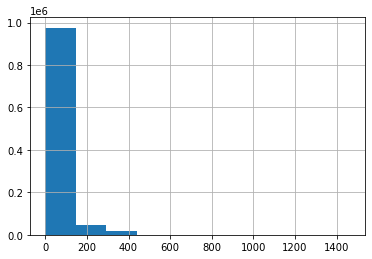

In [173]:
all_trips.test_duration_sec.hist();

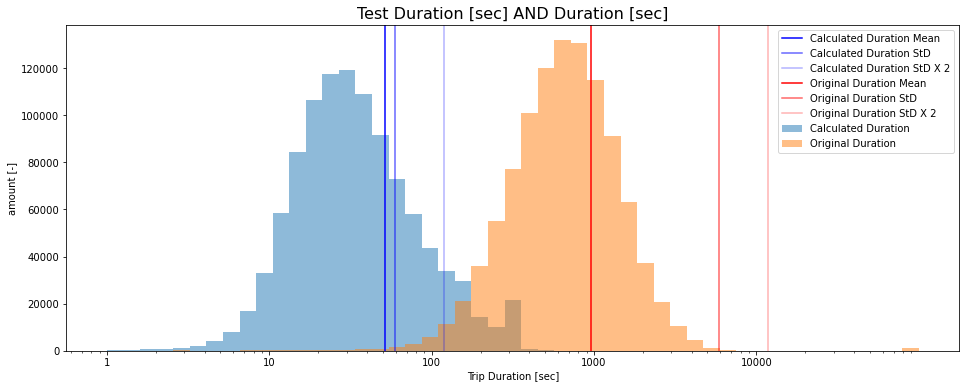

In [207]:
bins = 10**np.linspace(0,5)
plt.figure(figsize = [16, 6])
plt.hist(all_trips.test_duration_sec, bins = bins, alpha = 0.5, label = 'Calculated Duration');
plt.hist(all_trips.duration, bins = bins, alpha = 0.5, label = 'Original Duration');
plt.axvline(all_trips.test_duration_sec.mean(), color = "blue", label = 'Calculated Duration Mean')
plt.axvline(all_trips.test_duration_sec.std(), alpha = 0.6, color = "blue", label = 'Calculated Duration StD')
plt.axvline(all_trips.test_duration_sec.std() * 2, alpha = 0.3, color = "blue", label = 'Calculated Duration StD X 2')
plt.axvline(all_trips.duration.mean(), color = "red", label = 'Original Duration Mean')
plt.axvline(all_trips.duration.std(), color = "red", alpha = 0.6, label = 'Original Duration StD')
plt.axvline(all_trips.duration.std() * 2, alpha = 0.3, color = "red", label = 'Original Duration StD X 2')
plt.xscale('log');
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000']);
plt.xlabel('Trip Duration [sec]' );
plt.title('Test Duration [sec] AND Duration [sec]', fontsize = 16 );
plt.ylabel('amount [-]');
plt.legend();

Check difference betweed Original and calculated trip duration

In [215]:
(all_trips.duration.median() - all_trips.test_duration_sec.median()) / 60

10.540529632285663

It looks like we have approximatelly ten minutes for trip preparation (that is take off and landing)

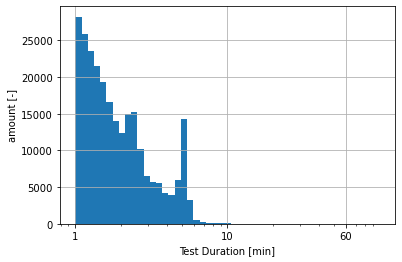

In [216]:
#check Calculated trip duration in minutes
bins = 10**np.linspace(0,2)
all_trips.test_duration_min.hist(bins=bins);
plt.xscale('log');
plt.xticks([1, 10, 60], ['1', '10', '60']);
plt.xlabel('Test Duration [min]');
plt.ylabel('amount [-]');

# Drop trips with duration more than 1 hour and 40 minutes
It looks reasonable not to take more than 6000 seconds for trip preparation. We will concider Original durations of more than 6000 seconds (100 minutes which is 1 hour and 40 minutes) as outliers and therefore not concider this into the analysis 

In [223]:
#drop trips lasting more than 1h 40mins
all_trips.drop(all_trips.query('duration > 6000').index, inplace = True)

In [226]:
all_trips.shape

(1041861, 17)

In [225]:
all_trips.describe()[['duration', 'test_duration_sec', 'distance']]

,duration,test_duration_sec,distance
count,1041861.0000,1041861.0000,1041861.0000
mean,836.4239,51.6984,3.4466
std,648.7570,59.0039,3.9336
min,1.0000,0.0159,0.0011
25%,398.0000,18.6245,1.2416
50%,662.0000,31.5553,2.1037
75%,1073.0000,58.3087,3.8872
max,5999.0000,1463.7932,97.5862


# Create price field
<center>
We will taking into concideration the most common answer from the previous analysis to start testing loops in order to lead a meaningfull price both for us and competition. 
<center>
    
```
count    400.000000
mean      23.180000
std        9.278082
min        5.000000
25%       16.750000
50%       23.000000
75%       29.000000
max       46.000000
Name: Q9, dtype: float64
```
    
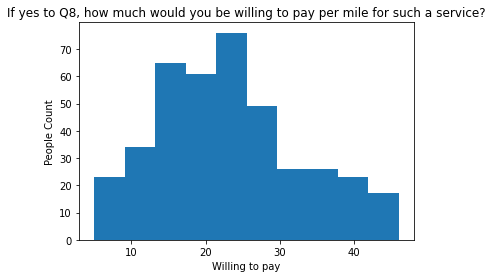

I suggest 25 USD per mile to be a reasonable price plus 10 USD for the hiring service. We need to develop further our technology to offer a meaningful service to handicapt carriers

In [229]:
# create price field
all_trips['price'] = all_trips.loc[:, 'distance'] * 25 + 10

In [230]:
# create duration to distance field
all_trips['duration_distance'] = all_trips.loc[:, 'test_duration_sec'] / all_trips.loc[:, 'distance']

In [233]:
all_trips.describe()[['duration', 'test_duration_sec', 'distance', 'duration_distance', 'price']]

,duration,test_duration_sec,distance,duration_distance,price
count,1041861.0000,1041861.0000,1041861.0000,1041861.0000,1041861.0000
mean,836.4239,51.6984,3.4466,15.0000,96.1640
std,648.7570,59.0039,3.9336,0.0005,98.3398
min,1.0000,0.0159,0.0011,14.9572,10.0264
25%,398.0000,18.6245,1.2416,15.0000,41.0408
50%,662.0000,31.5553,2.1037,15.0000,62.5922
75%,1073.0000,58.3087,3.8872,15.0000,107.1811
max,5999.0000,1463.7932,97.5862,15.1021,2449.6553


In [235]:
all_trips.describe()[['duration','test_duration_sec', 'distance', 'duration_distance', 'price']].to_csv('clean_data.csv', index = False)

In [236]:
all_trips.to_csv('clean_rides.csv', index = False)